In [179]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import ttest_1samp

%matplotlib inline
np.random.seed(42)
given_df = pd.read_csv("all_features.csv", header=None)

In [104]:
# refactoring all_features.csv

a = np.empty((1301, 18), dtype=object)
a[0][0] = "label"
a[0][1] = "index"
a[0][2] = "nr_pix"
a[0][3] = "rows_with_1"
a[0][4] = "cols_with_1"
a[0][5] = "rows_with_3p"
a[0][6] = "cols_with_3p"
a[0][7] = "aspect_ratio"
a[0][8] = "neigh_1"
a[0][9] = "no_neigh_above"
a[0][10] = "no_neigh_below"
a[0][11] = "no_neigh_left"
a[0][12] = "no_neigh_right"
a[0][13] = "no_neigh_horiz"
a[0][14] = "no_neigh_vert"
a[0][15] = "connected_areas"
a[0][16] = "eyes"
a[0][17] = "diagonalness"

for y in range(1300):
    for x in range(18):
        a[y+1][x] = given_df.iloc[y,0].split("\t")[x]

def custom_formatter(x):
    if isinstance(x, int):
        return "%d" % x
    elif isinstance(x, float):
        return "%.2f" % x
    else:
        return str(x)
np.savetxt("formatted_features.csv", np.vectorize(custom_formatter)(a), delimiter=",", fmt="%s")
df = pd.read_csv("formatted_features.csv")

In [148]:
# section 3.1

df["classifier"] = df["label"].map({"a":0,"b":1,"c":2,"d":3,"e":4,"f":5,"g":6,"h":7,"i":8,"j":9,"smiley":10,"sad": 11,"xclaim":12})
kfolds = 5
kf = KFold(n_splits=kfolds, shuffle=True, random_state=42)

pg = { "n_estimators":[25, 75, 125, 175, 225, 275, 325, 375], "max_features":[2,4,6,8] }

rf_classifier = RandomForestClassifier(n_estimators=i, random_state=42)
gs = GridSearchCV(rf_classifier, pg, cv=kf, scoring="accuracy")

x = df[["nr_pix", "rows_with_1", "cols_with_1", "rows_with_3p", "cols_with_3p", "aspect_ratio", "neigh_1", "no_neigh_above", "no_neigh_below", "no_neigh_left", "no_neigh_right", "no_neigh_horiz", "no_neigh_vert", "connected_areas", "eyes", "diagonalness"]]
y = df["classifier"]
gs.fit(x, y)

print(gs.best_score_)

0        0
1        0
2        0
3        0
4        0
        ..
1295    12
1296    12
1297    12
1298    12
1299    12
Name: classifier, Length: 1300, dtype: int64
0.783076923076923


0.783076923076923
{'max_features': 8, 'n_estimators': 275}


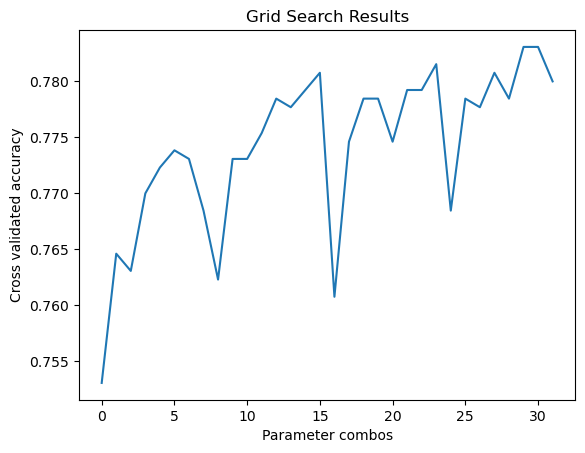

0 : Nt= 25  Np= 2
1 : Nt= 25  Np= 4
2 : Nt= 25  Np= 6
3 : Nt= 25  Np= 8
4 : Nt= 75  Np= 2
5 : Nt= 75  Np= 4
6 : Nt= 75  Np= 6
7 : Nt= 75  Np= 8
8 : Nt= 125  Np= 2
9 : Nt= 125  Np= 4
10 : Nt= 125  Np= 6
11 : Nt= 125  Np= 8
12 : Nt= 175  Np= 2
13 : Nt= 175  Np= 4
14 : Nt= 175  Np= 6
15 : Nt= 175  Np= 8
16 : Nt= 225  Np= 2
17 : Nt= 225  Np= 4
18 : Nt= 225  Np= 6
19 : Nt= 225  Np= 8
20 : Nt= 275  Np= 2
21 : Nt= 275  Np= 4
22 : Nt= 275  Np= 6
23 : Nt= 275  Np= 8
24 : Nt= 325  Np= 2
25 : Nt= 325  Np= 4
26 : Nt= 325  Np= 6
27 : Nt= 325  Np= 8
28 : Nt= 375  Np= 2
29 : Nt= 375  Np= 4
30 : Nt= 375  Np= 6
31 : Nt= 375  Np= 8


In [147]:
# section 3.1 cntd

print(gs.best_score_)
print(gs.best_params_)

plt.plot(results['mean_test_score'])
plt.xlabel("Parameter combos")
plt.ylabel("Cross validated accuracy")
plt.title("Grid Search Results")
plt.show()

inc = 0
for x in [25, 75, 125, 175, 225, 275, 325, 375]:
    for y in [2, 4, 6, 8]:
        print(inc, ": Nt=", x," Np=", y)
        inc += 1

In [171]:
# section 3.2
# best combination was 8 features, 275 trees

cv_scores = []
kf = KFold(n_splits=5, shuffle=True)
for i in range(15):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=i)
    rf = RandomForestClassifier(n_estimators=275, max_features=8, random_state=42)
    rf.fit(x_train, y_train)
    scores = cross_val_score(rf, x, y, cv=kf, scoring='accuracy')
    mean_score = np.mean(scores)
    cv_scores.append(mean_score)

In [189]:
print(cv_scores)
print()
print("Mean:", np.mean(cv_scores))
print("Standard Deviation", np.std(cv_scores))

t_stat, p_value = ttest_1samp(cv_scores, np.mean(results["mean_test_score"]))
print("T Statistic:", t_stat, "  P-value:", p_value)

[np.float64(0.783076923076923), np.float64(0.7869230769230768), np.float64(0.7853846153846152), np.float64(0.7884615384615384), np.float64(0.7861538461538462), np.float64(0.7946153846153846), np.float64(0.7884615384615385), np.float64(0.8023076923076923), np.float64(0.7815384615384615), np.float64(0.78), np.float64(0.7946153846153846), np.float64(0.7769230769230769), np.float64(0.7869230769230768), np.float64(0.786153846153846), np.float64(0.7923076923076924)]

Mean: 0.7875897435897437
Standard Deviation 0.006204068568138104
T Statistic: 8.056762194196997   P-value: 1.261137676311445e-06
